# Visual Exploratory analysis of Telecom churn data

## 1. Dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv(r"C:\Users\Guestuser\Downloads\telecom_churn.csv")
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...    total eve calls  total eve charge  \
0             45.07  ...                 99             16.78   
1             27.47  ...                103             16.62   
2             41.38  ...                110             10.30   
3             50.90  ...                 88              5.26   
4             28.34  ...                122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [3]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

The last column 'churn' is our target variable.

# 2. Univariate visualization

Univariate analysis looks at one feature at a time. when we analyse a feature independently, we are usually interested of its values and ignore other features in the dataset.

### 2.1 Quantitative features:

Quantitative features take on ordered numerical values. These values can be discrete ( i.e integers), or continuous ( i.e real numbers) and usually express a count or measurement.

### Histograms 

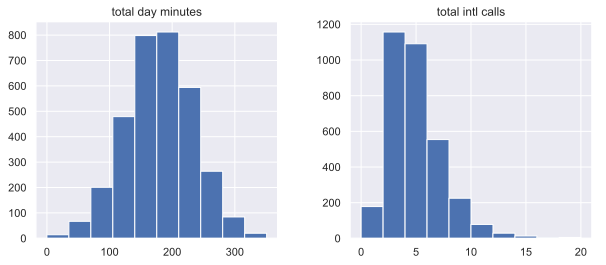

In [4]:
features = ['total day minutes', 'total intl calls']
df[features].hist(figsize=(10,4));

A histogram groups values into bins of equal value range. The shape of the histogram provides the clues about the underlying distribution type. We can also spot any skewness in tis shape.  Knowing a distribution of the feature values is importtant when we use machine leaning methods that assume a particular type of it, most often Gaussian.

In the above plot 'total day minutes' is normally distributed, but the 'total intl calls' is skewed right ( itis tail is longer on the right )

## Density plots

Another ways to understand the distribution is by using the density plots or more formally Kernal Density Plots. These are like a smoothed version of histogram.

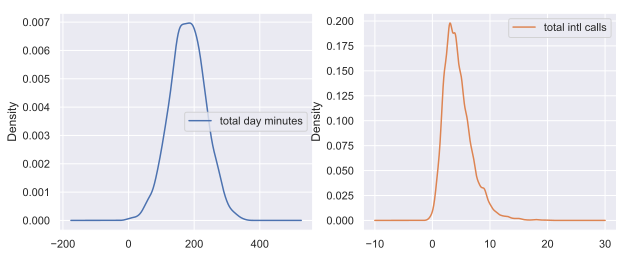

In [5]:
df[features].plot(kind='density', subplots=True, layout=(1,2), 
                  sharex=False, figsize=(10,4));

We can also pot distribution with seaborn's distplot().  distplot() displays the histogram with kernel density estimate on top. Let us see the distribution of 'ttal day minutes'.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


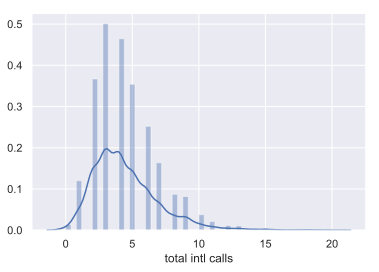

In [6]:
x = df['total intl calls']
sns.distplot(x);

The height of the histogram bars here is normed and shows the density rather than the number of examles in each bin.

### Box plot

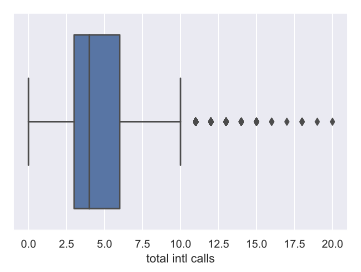

In [7]:
sns.boxplot(x = 'total intl calls', data = df);

Let's see how to interpret a box plot. Its components are a box (obviously, this is why it is called a box plot), the so-called whiskers, and a number of individual points (outliers).

The box by itself illustrates the interquartile spread of the distribution; its length is determined by the 25th(Q1) and 75th(Q3) percentiles. The vertical line inside the box marks the median (50%) of the distribution.

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval (Q1−1.5⋅IQR,Q3+1.5⋅IQR), where IQR=Q3−Q1 is the interquartile range.

Outliers that fall out of the range bounded by the whiskers are plotted individually as black points along the central axis.

We can see that a large number of international calls is quite rare in our data.

### Violin plot

violinplot is also another distribution plot.

violinplot displays the kernal density estimate on both sides

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


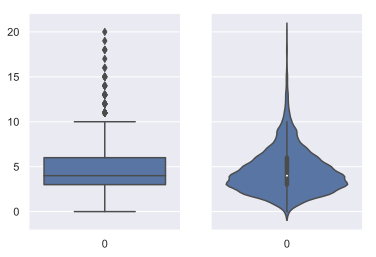

In [8]:
_, axes = plt.subplots(1,2, sharey=True, figsize=(6,4))
sns.boxplot(data=df['total intl calls'], ax=axes[0]);
sns.violinplot(data=df['total intl calls'], ax = axes[1]);

The difference between the box and violin plots is that the former illustrates certain statistics concerning individual examples in a dataset while the violin plot concentrates more on the smoothed distribution as a whole.

In our case, the violin plot does not contribute any additional information about the data as everything is clear from the box plot alone.

### Numerical statisticks of the distribution

In [9]:
df[features].describe()

total day minutes  total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

### 2.2 Categorical and Binary features

Categorical features take on a fixed number of values. Each of these values assigns an observation to a corresponding group, known as a category, which reflects some qualitative property of this example. Binary variables are an important special case of categorical variables when the number of possible values is exactly 2. If the values of a categorical variable are ordered, it is called ordinal.

### Frequency table

Let us check the distribution of our target varible (i.e churn )
First we will print frequency table, which shows how freqent each value of the categorical variable is. 

In [10]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

By default, the entries in the output are sorted from the most to the least frequently-occurring values.

In our case, the data is not balanced; that is, our two target classes, loyal and disloyal customers, are not represented equally in the dataset. Only a small part of the clients canceled their subscription to the telecom service.

### Bar plot

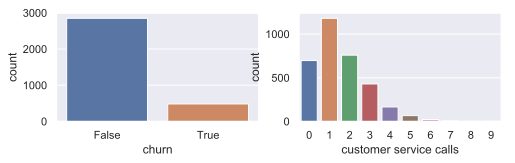

In [11]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,2))

sns.countplot(x='churn', data = df, ax = axes[0])
sns.countplot(x='customer service calls', data = df, ax = axes[1]);

We have seen the histograms above, now we have seen the bar plots, they look similar, but there are several differences between them:

1. Histograms are best suited for looking at the distribution of numerical variables while bar plots are used for categorical features.
2. The values on the X-axis in the histogram are numerical; a bar plot can have any type of values on the X-axis: numbers, strings, booleans
3. The histogram's X-axis is a Cartesian coordinate axis along which values cannot be changed; the ordering of the bars is not predefined. Still, it is useful to note that the bars are often sorted by height, that is, the frequency of the values. Also, we we consider ordinal varibles ( like cusotmer service calls in our data), the bars are usually ordered by variable value.

The left chart above vividly illustrates the imbalance in our target variable. The bar plot for Customer service calls on the right gives a hint that the majority of customers resolve their problems in maximum 2–3 calls. But, as we want to be able to predict the minority class, we may be more interested in how the fewer dissatisfied customers behave. It may well be that the tail of that bar plot contains most of our churn. These are just hypotheses for now, so let's move on to some more interesting and powerful visual techniques

# 3. Multivariate visualization

Multivariate plots allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.

## 3.1 Quantitative-Quantitative

### Correlation matrix

We will analyse the correlations among the numerical variables in our dataset.
Let us drop the non-numerical variables and print the correlation matrix

In [12]:
numerical = list(set(df.columns)-set(['state', 'international plan', 'voice mail plan',
                                     'area code', 'churn', 'customer service calls']))
corr_matrix = df[numerical].corr()
corr_matrix

total day calls  total night minutes  total day charge  \
total day calls               1.000000             0.022938          0.006753   
total night minutes           0.022938             1.000000          0.004324   
total day charge              0.006753             0.004324          1.000000   
total day minutes             0.006750             0.004323          1.000000   
total intl minutes            0.021565            -0.015207         -0.010157   
account length                0.038470            -0.008955          0.006214   
total night charge            0.022927             0.999999          0.004301   
number vmail messages        -0.009548             0.007681          0.000776   
total eve calls               0.006462            -0.002093          0.015769   
total night calls            -0.019557             0.011204          0.022972   
total intl calls              0.004574            -0.012353          0.008032   
total eve minutes            -0.021451            -0.012584          0.007050   
total intl charge             0.021666            -0.015180         -0.010094   
total eve charge             -0.021449            -0.012592          0.007036   

                       total day minutes  total intl minutes  account length  \
total day calls                 0.006750            0.021565        0.038470   
total night minutes             0.004323           -0.015207       -0.008955   
total day charge                1.000000           -0.010157        0.006214   
total day minutes               1.000000           -0.010155        0.006216   
total intl minutes             -0.010155            1.000000        0.009514   
account length                  0.006216            0.009514        1.000000   
total night charge              0.004300           -0.015214       -0.008960   
number vmail messages           0.000778            0.002856       -0.004628   
total eve calls                 0.015769            0.008703        0.019260   
total night calls               0.022972           -0.013605       -0.013176   
total intl calls                0.008033            0.032304        0.020661   
total eve minutes               0.007043           -0.011035       -0.006757   
total intl charge              -0.010092            0.999993        0.009546   
total eve charge                0.007029           -0.011043       -0.006745   

                       total night charge  number vmail messages  \
total day calls                  0.022927              -0.009548   
total night minutes              0.999999               0.007681   
total day charge                 0.004301               0.000776   
total day minutes                0.004300               0.000778   
total intl minutes              -0.015214               0.002856   
account length                  -0.008960              -0.004628   
total night charge               1.000000               0.007663   
number vmail messages            0.007663               1.000000   
total eve calls                 -0.002056              -0.005864   
total night calls                0.011188               0.007123   
total intl calls                -0.012329               0.013957   
total eve minutes               -0.012593               0.017562   
total intl charge               -0.015186               0.002884   
total eve charge                -0.012601               0.017578   

                       total eve calls  total night calls  total intl calls  \
total day calls               0.006462          -0.019557          0.004574   
total night minutes          -0.002093           0.011204         -0.012353   
total day charge              0.015769           0.022972          0.008032   
total day minutes             0.015769           0.022972          0.008033   
total intl minutes            0.008703          -0.013605          0.032304   
account length                0.019260          -0.013176          0.020661   
total night charge           -0.

let us plot the heatmap

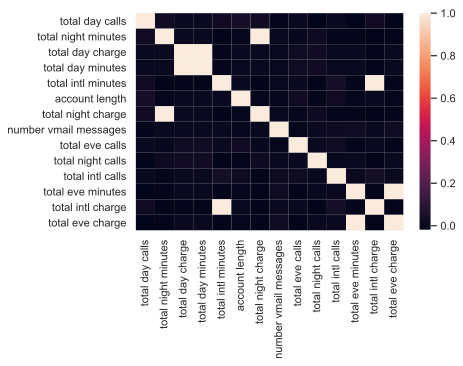

In [13]:
sns.heatmap(corr_matrix);

As seen in the correlation plot above, we can notice that there are 4 variables ( 'total day charge', 'total eve charge', 'total night charge', 'total intl charge' ) are directly depended on ('total day call', 'total eve calls', 'total night calls', 'total intl calls'). 
These are called dependent variables and can be leftout since they do not contribute any additional information. so let's drop them:

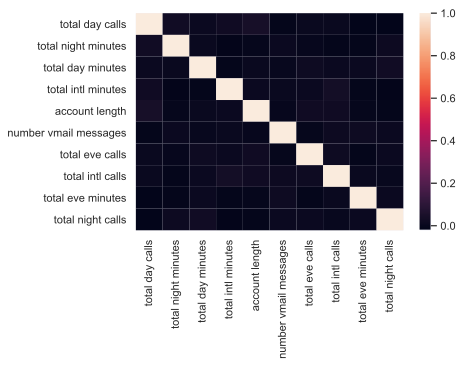

In [14]:
numerical = list(set(numerical)-set(['total day charge', 'total eve charge', 'total night charge', 'total intl charge']))
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

### Scatter plot

The scatter plot displays values of two numerical variables as Cartesian coordinates in 2D. Scatter plots in 3D are also possible.

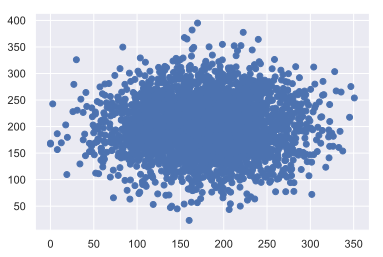

In [15]:
plt.scatter(df['total day minutes'], df['total night minutes']);

The above plot is not interesting, these features are non-correlated, because the ellipse like shape is aligned with the axes.

Let us use the seaborn's jointplot

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


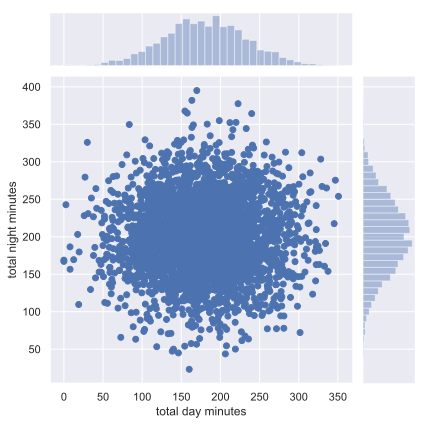

In [16]:
sns.jointplot(x='total day minutes', y='total night minutes', data=df, kind = 'scatter');

The jointplot plots two histograms that may be useful in some cases.
Using the jointplot, we can also get a smoothed version of our bivariate distribution.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


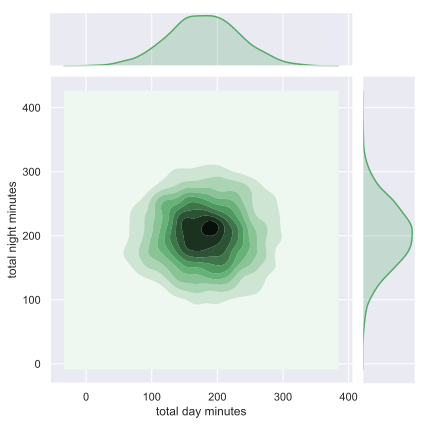

In [17]:
sns.jointplot('total day minutes', 'total night minutes', data = df, kind = 'kde', color='g');

this is nothing but a bivariate version of Kernal Density Plot discussed earlier.

### Scatterplot matrix

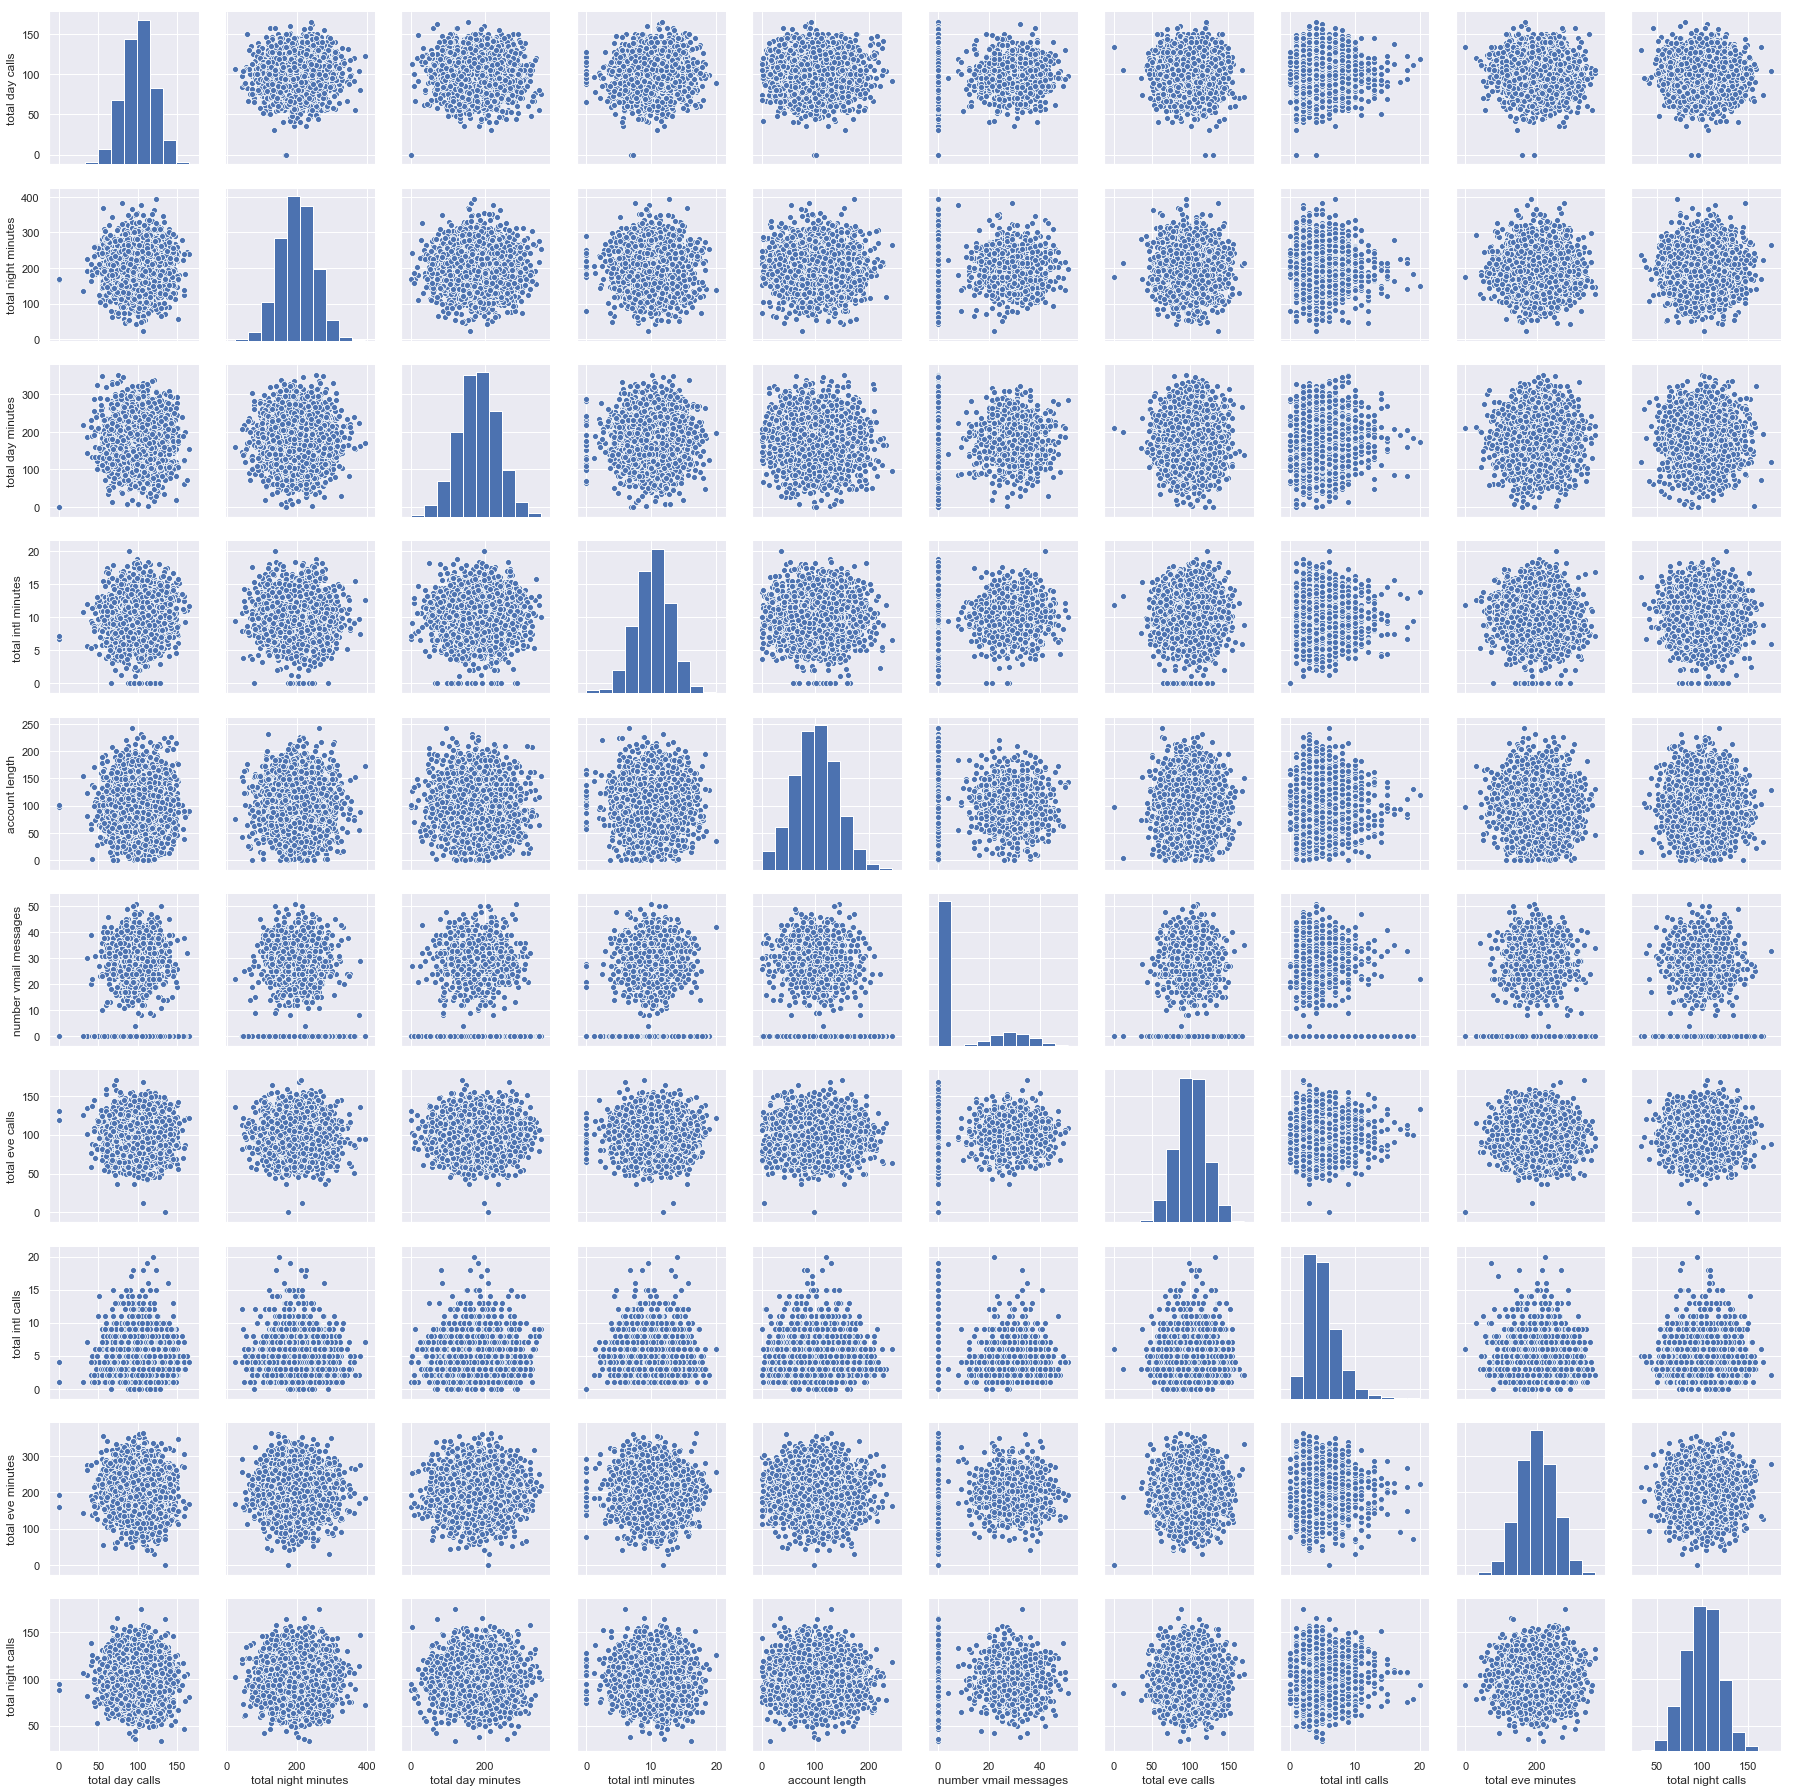

In [20]:
# pairplot() may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [22]:
%config InlineBackend.figure_format = 'svg'

### 3.2 Quantitative - Categorical

we will try to gain new insights for churn prediction from the interactions between the numerical and categorical features.

we will try to interpret how the input variables are related to the target varible 'churn'

Previously, you learned about scatter plots. Additionally, their points can be color or size coded so that the values of a third categorical variable are also presented in the same figure. We can achieve this with the scatter() function seen above, but, let's try a new function called lmplot() and use the parameter hue to indicate our categorical feature of interest:

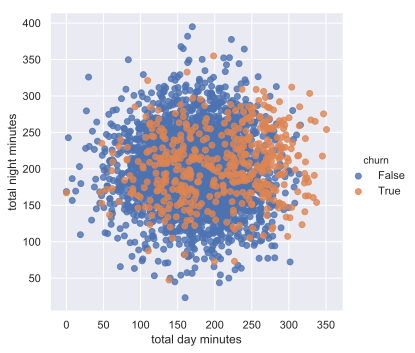

In [23]:
sns.lmplot('total day minutes', 'total night minutes', data = df, hue='churn', fit_reg=False);

It seems that our small proportion of disloyal customers lean towards the top-right corner; that is, such customers tend to spend more time on the phone during both day and night. But this is not absolutely clear, and we won't make any definitive conclusions from this chart.

Now, let’s create box plots to visualize the distribution statistics of the numerical variables in two disjoint groups: the loyal customers (churn=False) and those who left (churn=True).

In [25]:
numerical = list(set(numerical)-set(['phone number']))

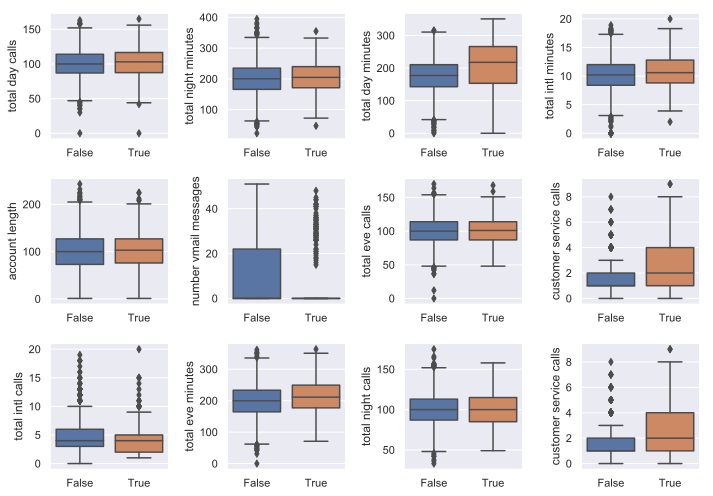

In [26]:
# sometimes we can analyse an ordinal variables just as numerical one
numerical.append('customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10,7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='churn', y = feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

From the above charts, we can notice that there is a lot of discrepancy in distribution between the two groups is for three variables, 'total day minutes', 'cusotmer service calls' and 'number vmail messages'. 

Let's look at the distribution of day minutes spoken for the loyal and disloyal cusotmers separately. We will create box and violin plots for 'total day minutes' grouped by the target variable.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


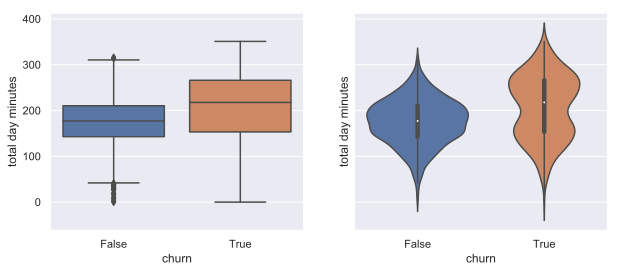

In [29]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='churn', y='total day minutes', data = df, ax = axes[0]);
sns.violinplot(x='churn', y='total day minutes', data = df, ax = axes[1]);

In this case, the violin plot does not contribute any additional information about our data as everything is clear from the box plot alone: disloyal customers tend to talk on the phone more.

An interesting observation: on average, customers that discontinue their contracts are more active users of communication services. Perhaps they are unhappy with the tariffs, so a possible measure to prevent churn could be a reduction in call rates. The company will need to undertake additional economic analysis to find out whether such measures would be beneficial.

When we want to analyze a quantitative variable in two categorical dimensions at once, there is a suitable function for this in the seaborn library called catplot(). For example, let's visualize the interaction between total day minutes and two categorical variables in the same plot:

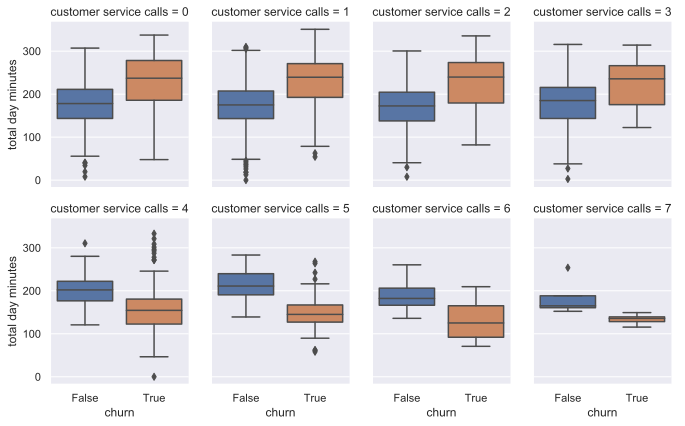

In [32]:
sns.catplot(x='churn', y = 'total day minutes', col='customer service calls',
           data=df[df['customer service calls'] < 8], kind = 'box', col_wrap=4, height=3, aspect=0.8);

From the above plots, we can notice that, starting with 4 calls, total day minutes may no longer be the main factor for customer churn. Perhaps, in addition to ur previous guess about the tariffs, there are cusomters that are dissatisfied with the service due to other problems, which might lead to fewer number of day minutes spent on calls.

### 3.3 Categorical-Categorical

As we saw earlier in this article, the variable Customer service calls has few unique values and, thus, can be considered either numerical or ordinal. We have already seen its distribution with a count plot. Now, we are interested in the relationship between this ordinal feature and the target variable Churn.

Let's look at the distribution of the number of calls to the customer service, again using a count plot. This time, let's also pass the parameter hue=Churn that adds a categorical dimension to the plot:

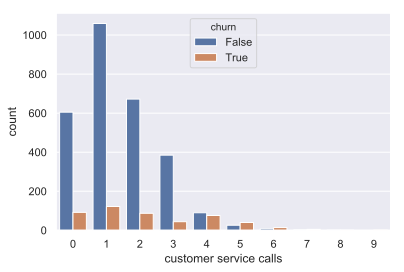

In [33]:
sns.countplot(x='customer service calls', hue='churn', data=df);

An observation: the churn rate increases significantly after 4 or more calls to the customer service.

Now, let's look at the relationship between Churn and the binary features, International plan and Voice mail plan.

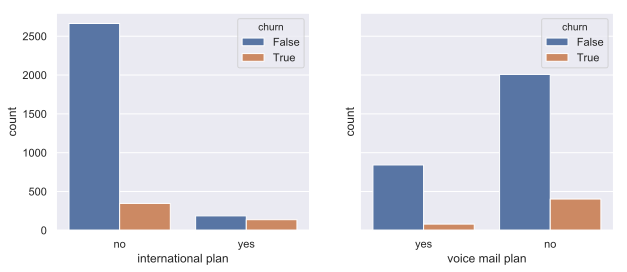

In [34]:
_, axes = plt.subplots(1, 2, sharey = True, figsize=(10,4))

sns.countplot(x = 'international plan', hue = 'churn', data = df, ax = axes[0]);
sns.countplot(x = 'voice mail plan', hue = 'churn', data = df, ax = axes[1]);

An observation: when International Plan is enabled, the churn rate is much higher; the usage of the international plan by the customer is a strong feature. We do not observe the same effect with Voice mail plan.

### Contingency table

In addition to using graphical means for categorical analysis, there is a traditional tool from statistics: a contingency table, also called a cross tabulation. It represents multivariate frequency distribution of categorical variables in tabular form. In particular, it allows us to see the distribution of one variable conditional on the other by looking along a column or row.

Let's try to see how Churn is related to the categorical variable State by creating a cross tabulation

In [37]:
pd.crosstab(df['state'], df['churn'])

churn  False  True 
state              
AK        49      3
AL        72      8
AR        44     11
AZ        60      4
CA        25      9
CO        57      9
CT        62     12
DC        49      5
DE        52      9
FL        55      8
GA        46      8
HI        50      3
IA        41      3
ID        64      9
IL        53      5
IN        62      9
KS        57     13
KY        51      8
LA        47      4
MA        54     11
MD        53     17
ME        49     13
MI        57     16
MN        69     15
MO        56      7
MS        51     14
MT        54     14
NC        57     11
ND        56      6
NE        56      5
NH        47      9
NJ        50     18
NM        56      6
NV        52     14
NY        68     15
OH        68     10
OK        52      9
OR        67     11
PA        37      8
RI        59      6
SC        46     14
SD        52      8
TN        48      5
TX        54     18
UT        62     10
VA        72      5
VT        65      8
WA        52     14
WI        71      7
WV        96     10
WY        68      9

In the case of State, the number of distinct values is rather high: 51. We see that there are only a few data points available for each individual state – only 3 to 17 customers in each state abandoned the operator. Let's ignore that for a second and calculate the churn rate for each state, sorting it from high to low:

In [38]:
df.groupby(['state'])['churn'].agg([np.mean]).sort_values(by='mean', ascending=False)

mean
state          
NJ     0.264706
CA     0.264706
TX     0.250000
MD     0.242857
SC     0.233333
MI     0.219178
MS     0.215385
NV     0.212121
WA     0.212121
ME     0.209677
MT     0.205882
AR     0.200000
KS     0.185714
NY     0.180723
MN     0.178571
PA     0.177778
MA     0.169231
CT     0.162162
NC     0.161765
NH     0.160714
GA     0.148148
DE     0.147541
OK     0.147541
OR     0.141026
UT     0.138889
CO     0.136364
KY     0.135593
SD     0.133333
OH     0.128205
FL     0.126984
IN     0.126761
ID     0.123288
WY     0.116883
MO     0.111111
VT     0.109589
AL     0.100000
NM     0.096774
ND     0.096774
WV     0.094340
TN     0.094340
DC     0.092593
RI     0.092308
WI     0.089744
IL     0.086207
NE     0.081967
LA     0.078431
IA     0.068182
VA     0.064935
AZ     0.062500
AK     0.057692
HI     0.056604

It seems that the churn rate in New Jersey and California are above 25% and less than 6% for Hawaii and Alaska. However, these conclusions are based on too few examples, and our observation could be a mere property of our particular dataset. 